# Разведочный анализ данных и начало машинного обучения



**Цели на буткемп:**

* провести разведочный анализ данных

* построить и проинтерпретировать ML-модель

* обернуть ее в интерактивный веб-сервис

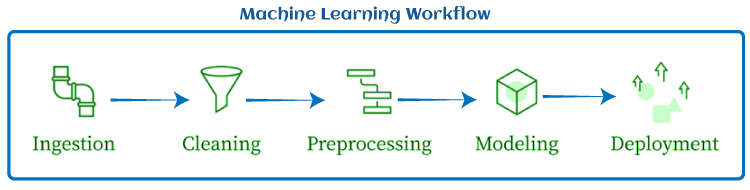

**Цели на сегодня:**

* понять влияние различных факторов (экономических, личных, социальных) на оценки студентов на экзаменах

* научиться делать разведочный анализ данных

* построить первую модель машинного обучения

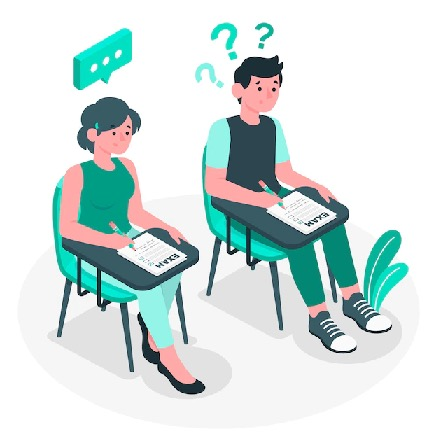

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/1553768847-housing.csv')

## Описание данных

* longitude - долгота

* latitude - широта

* housing_median_age - средний срок экспл. дома

* total_rooms - всего количество комнат

* total_bedrooms - всего количество спален

* population - население

* households - домохохяйства

* median_income - средний доход

* ocean_proximity - близость океана

* median_house_value - средняя стоимость дома

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


## Исследование данных

Размер датасета

In [ ]:
df.shape

(20640, 10)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Основные числовые характеристики

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


## Однофакторный анализ

## Среднее время эксплуатации, средняя стоимость

In [ ]:
df[['housing_median_age', 'median_house_value']].describe()

,housing_median_age,median_house_value
count,20640.000000,20640.000000
mean,28.639486,206855.816909
std,12.585558,115395.615874
min,1.000000,14999.000000
25%,18.000000,119600.000000
50%,29.000000,179700.000000
75%,37.000000,264725.000000
max,52.000000,500001.000000


* в оценках есть пропуски

* есть некорректные оценки (меньше 0)

Посмотрим на распределение оценок

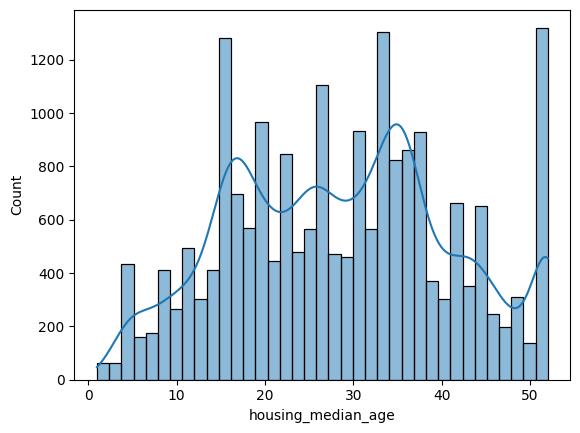

In [ ]:
sns.histplot(df['housing_median_age'], kde=True)
plt.show()

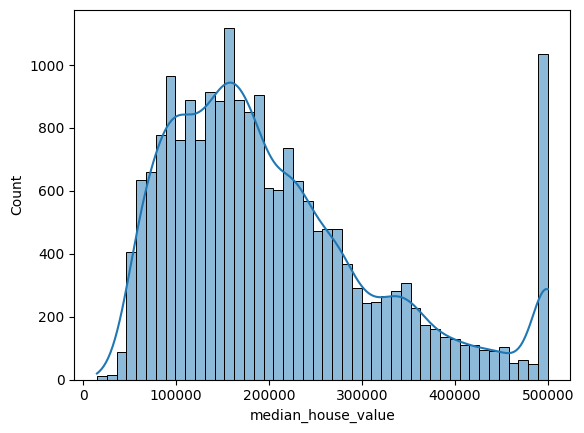

In [ ]:
sns.histplot(df['median_house_value'], kde=True)
plt.show()



* заменим пропуски на средние значения

In [ ]:
df['housing_median_age'] = np.where(df['housing_median_age'] < 0, 0, df['housing_median_age'])

df['housing_median_age'].min()

1

In [ ]:
mean = df['housing_median_age'].mean()

df['housing_median_age'].fillna(mean, inplace=True)

<ipython-input-13-5ee3cdc3b72d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['housing_median_age'].fillna(mean, inplace=True)


Есть ли связь между средней продолжительностью эксплуатации дома и среденй стоимостью жилья?

Построим матрицу корреляций для ответа на этот вопрос.

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами.

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

<Axes: >

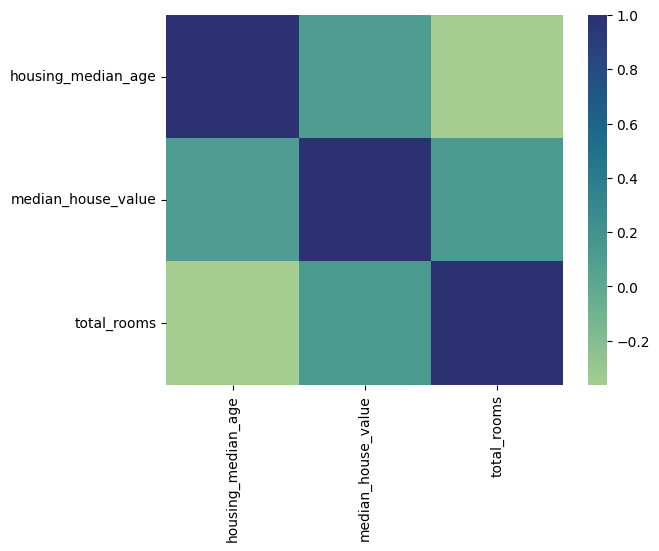

In [ ]:
corr = df[['housing_median_age','median_house_value', 'total_rooms']].corr()

sns.heatmap(corr, cmap="crest")

Зависимость средней продолжительности эксплуатации дома и средней стоимости дома составила 0,4
.


### Близость к океану

In [ ]:
df['ocean_proximity'].value_counts(dropna=False)

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [ ]:
df['ocean_proximity'].value_counts(dropna=False, normalize=True)

,proportion
ocean_proximity,
<1H OCEAN,0.442636
INLAND,0.317393
NEAR OCEAN,0.128779
NEAR BAY,0.110950
ISLAND,0.000242


In [ ]:
df['ocean_proximity'].fillna("unknown", inplace=True)

df['ocean_proximity'].value_counts(dropna=False)

<ipython-input-17-778ef43900ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ocean_proximity'].fillna("unknown", inplace=True)


,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Посмотрим простую гистограмму по близости к океану

<ipython-input-111-1e721c731b36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data = df, palette='spring')


<Axes: xlabel='ocean_proximity', ylabel='count'>

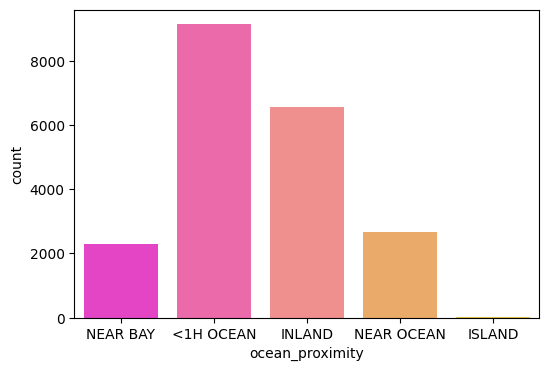

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='ocean_proximity', data = df, palette='spring')

Визуализируем связь средней продолжительности эксплуоатации дома в зависимости от близости к океану. На гистограмме изображены для каждой категории:



<ipython-input-19-fa9094143694>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ocean_proximity', y='housing_median_age', data = df, palette='spring')


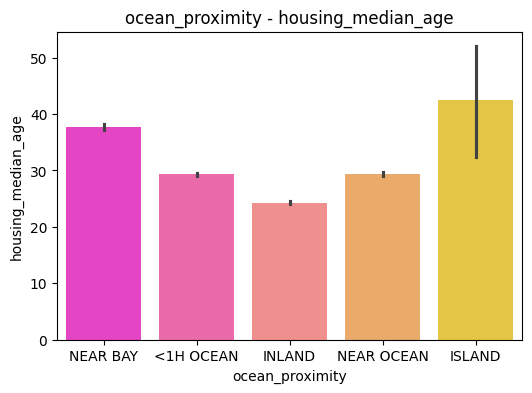

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='ocean_proximity', y='housing_median_age', data = df, palette='spring')
plt.title('ocean_proximity - housing_median_age')
plt.show()

In [ ]:
df[df.ocean_proximity == 'NEAR BAY']['housing_median_age'].mean(), df[df.ocean_proximity == '<1H OCEAN']['housing_median_age'].mean()

(37.73013100436681, 29.279225043782837)

Можно вычислять errorbars (интервалы) и [другими способами](https://seaborn.pydata.org/tutorial/error_bars.html):


eb.svg

Нарисуем errorbar, используя standard deviation (обычное стандартное отклонение)

<ipython-input-21-25dfb1a47861>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ocean_proximity', y='housing_median_age', errorbar = "sd", data = df, palette='spring')


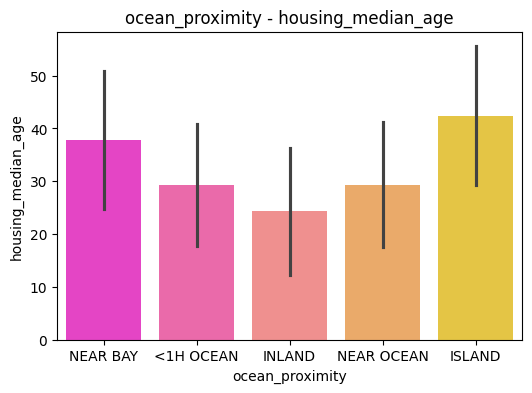

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='ocean_proximity', y='housing_median_age', errorbar = "sd", data = df, palette='spring')
plt.title('ocean_proximity - housing_median_age')
plt.show()

Ещё один вид визуализации - box plot или по другму ящик с усами.

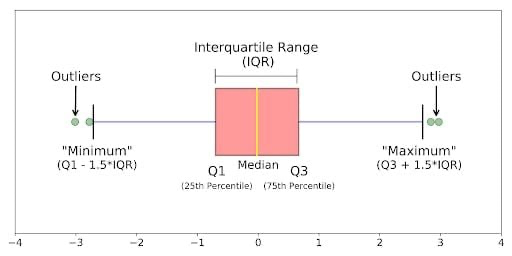

Посмотрим на ящик с усами, отображающий распределение средней продолжительности эксплуатации домов в зависимости от близости к океану.

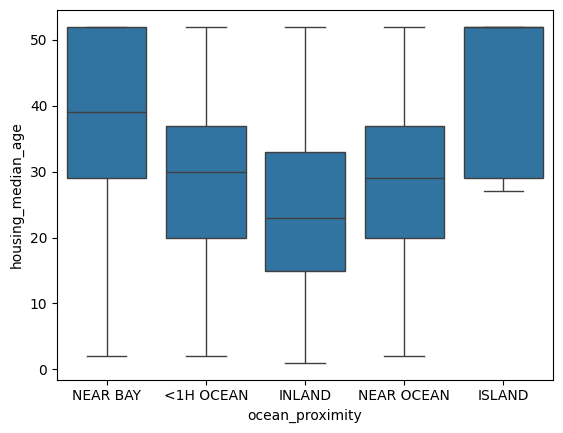

In [ ]:
sns.boxplot(x="ocean_proximity", y="housing_median_age", data=df)
plt.show()

## Бинаризация стоимости

Будем считать, что дом удовлетворит запрос клиента, если он существует больше **28 лет**.

In [ ]:
passmark = 28

Создадим столбец `value` где поставим: ;

* 1 - если продолжительность эксплуатации больше средней
* 0 - если меньше

In [ ]:
df['housing_median_age'] = df['housing_median_age'].apply(lambda x: 1 if x >= passmark else 0)

In [ ]:
df[['housing_median_age']].sample(10)

,housing_median_age
14283,0
1331,1
2807,1
5127,1
5292,1
10971,1
12728,1
11933,1
9243,0
806,1


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,0.528246,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,0.499214,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,0.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,0.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,1.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,1.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,1.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
len(df[df['housing_median_age'] == 0]) / len(df)

0.47175387596899226

# Машинное обучение

## Предсказание успешной сдачи экзамена по `writing`

**Цель:** попробуем по характеристикам студентов предсказать, сдаст каждый из них экзамен по `writing` или нет.

Вопросы:

* *что такое матрица объект-признак? что такое целевая переменная?*

* *что такое тренировочные и тестовые данные? зачем разбивать все данные на тренировочные и тестовые?*

* *что в нашей задаче будет целевой переменной?*

* *что такое классификация и регрессия? какого типа наша задача?*

Схема машинного обучения:

* есть обучающие данные (с известными ответами) - на них модель учится находить зависимость ответов от признаков объектов

* есть тестовые данные (с неизвестными для модели ответами) - на них мы проверяем качество обученной модели

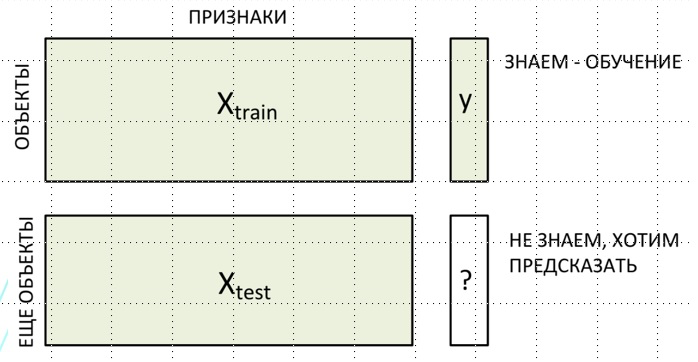

In [ ]:
X = df.drop(['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'housing_median_age'], axis=1)
y = df['housing_median_age'] # целевая переменная (target)

In [ ]:
X.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600
1,-122.22,37.86,358500
2,-122.24,37.85,352100
3,-122.25,37.85,341300
4,-122.25,37.85,342200


In [ ]:
y[:5]

,housing_median_age
0,1
1,0
2,1
3,1
4,1


Разобъем данные на тренировочную и тестовую части

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((15480, 3), (5160, 3))

Для решения нашей задачи будем использовать линейный классификатор под названием **логистическая регрессия**.

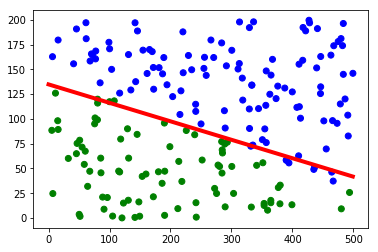

**Логистическая регрессия** - это линейный классификатор, прогноз которого является суммой признаков объектов с некоторыми коэффициентами (весами).

Когда модель предсказывает класс, она делает это по формуле
$$a(x) = sign(w_0 + w_1x_1 + w_2x_2 + ...),$$
то есть умножает признаки объекта $x_1,x_2,...$ на некоторые веса $w_0,w_1,w_2,...$

Например, если
* $x_1$ - `math score`
* $x_2$ - `lunch`,
то обученная модель может иметь вид
$$a(x) = sign(-12 + 1.2\cdot x_1 + 10\cdot x_2)$$

Веса модели подбираются автоматически так, чтобы модель как можно меньше ошибалась.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
pred[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# y_test.value_counts(normalize=True)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 759, 1655],
       [ 653, 2093]])

In [ ]:
# len(y_test[y_test == 0]), len(y_test[y_test == 1]), len(pred[pred == 0])

In [ ]:
model.coef_

array([[-0.04442726,  1.30143598,  0.0065041 ,  0.38515394]])

## Что дальше?

На следующем занятии:
* подробнее о том, что происходит при обучении логистической регрессии
* как интерпретировать результат/прогноз модели?
* как повлиять на прогнозы модели (выявить больше не сдавших экзамен)?
* как можно работать с категориальными признаками, у которых больше двух значений?

И начинаем двигаться в сторону сервиса! Обсудим Git и GitHub!

# Курсы сообщества AI Education

**Интенсивы**

---
[Разведочный анализ данных](https://stepik.org/a/177213)

На интенсиве вы познакомитесь с основными и продвинутыми подходами анализа данных:
  * Научитесь исследовать данные при помощи современных библиотек (NumPy, Pandas, Polars, Matplotlib, Seaborn)
  * Обучите свою первую модель машинного обучения
  * Построите интерактивный дашборд при помощи инструмента ExplainerDashboard
  * Начнете использовать такие инструменты разработчика как Git и Docker


[Линейные модели и их презентация](https://stepik.org/a/177215)  

В курсе вы не только разберете теоретическую сторону предмета, но и узнаете как использовать модели на практике:
  * Будете оценивать качество моделей регрессии и классификации
  * Проходить все этапы задачи ML: от разведочного анализа до получения прогноза и его интерпретации
  * Cтроить интерактивные дашборды при помощи библиотеки Streamlit
  * Cоздавать веб-сервисы с использованием фреймворка FastApi


В каждом интенсиве по 9 вебинаров (4 по анализу данных / 4 по разработке / финальный с подведением итогов и защитой проектов по желанию).

**Курсы**

---

[Практический Machine Learning](https://stepik.org/a/125501)

  * Курс посвящен изучению всех основных задач и подходов в машинном обучении. Курс дает как теорию методов, так и обширную практику.
  * За 16 недель курса вы пройдете путь практически с нуля в машинном обучении до уверенного владения основными алгоритмами и подходами.

[Прикладные задачи машинного обучения](https://stepik.org/a/175967)

* В курсе подробно разобраны следующие темы:

  * построение рекомендательных систем
  * анализ временных рядов
  * продвинутые методы интерпретации ML-моделей
  * AutoML

* Курс находится в процессе наполнения, в нем будут появляться новые актуальные и прикладные в ML-темы.